# **Seaborn**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.__version__

'0.13.2'

In [6]:
print(sns.__doc__)

None


In [7]:
#Printing the names of the datasets provided by seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
#Loading the Tips dataset
df=sns.load_dataset("tips")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.sample(6)

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
32,15.06,3.00,Female,No,Sat,Dinner,2
110,14.00,3.00,Male,No,Sat,Dinner,2
128,11.38,2.00,Female,No,Thur,Lunch,2
48,28.55,2.05,Male,No,Sun,Dinner,3
157,25.00,3.75,Female,No,Sun,Dinner,4


In [13]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

## **01. Relplot and Scatter Plot**

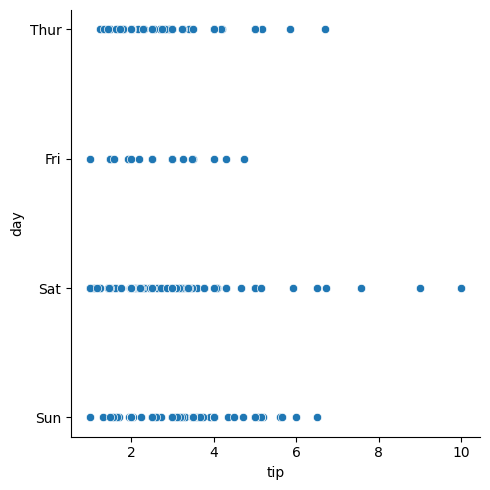

In [7]:
sns.relplot(data=df,x="tip",y="day")

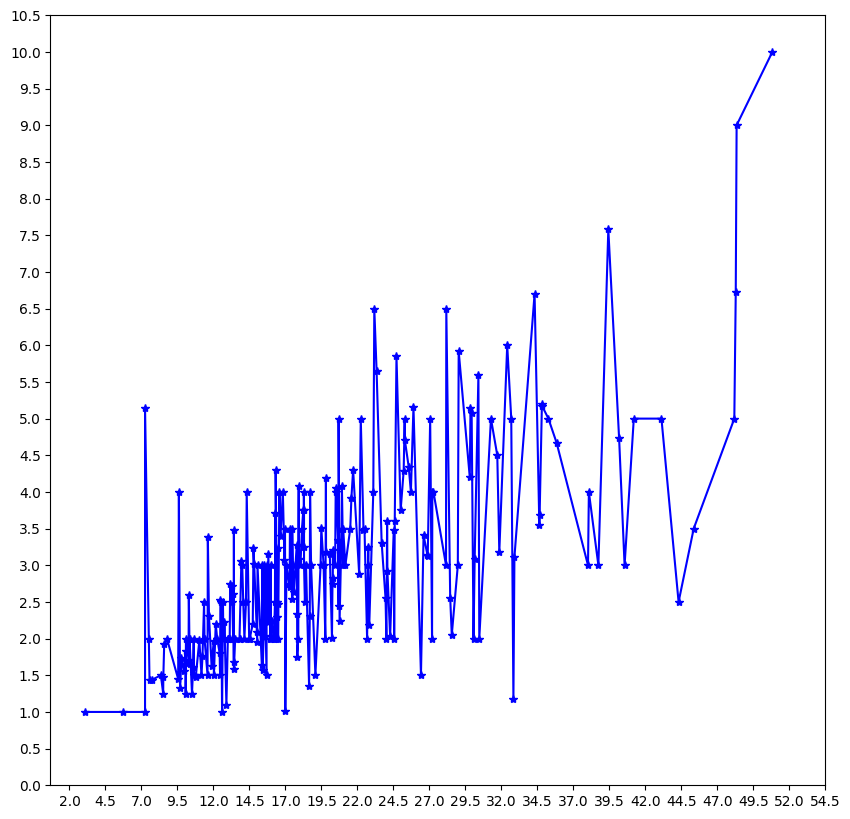

In [18]:
df.sort_values(by="total_bill",inplace=True)
plt.figure(figsize=(10,10))
plt.plot(df["total_bill"],df["tip"],color='b',linewidth=1.5,marker="*")
plt.xticks(np.arange(2,55,2.5))
plt.yticks(np.arange(0,11,0.5))
plt.show()

In [19]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

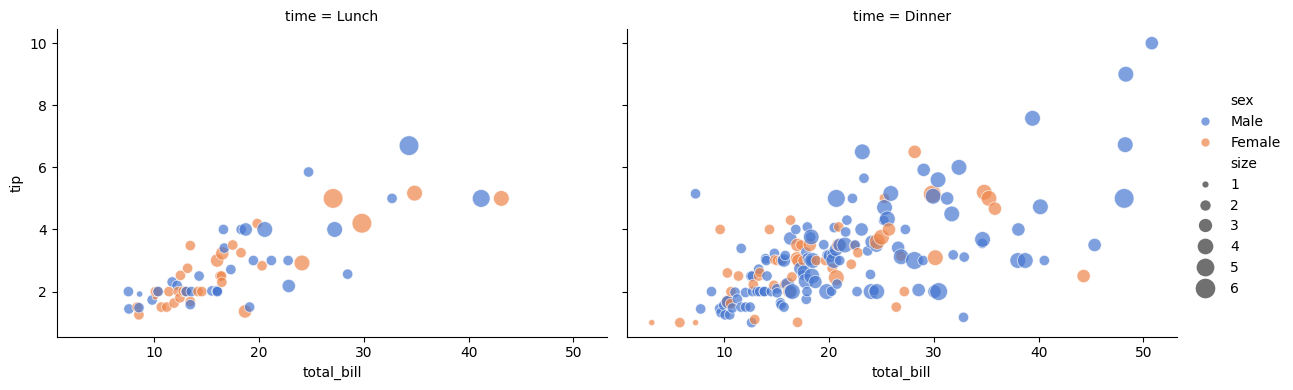

In [25]:
#Exploring more indepth Datainsights from the Tips dataset
sns.relplot(data=df,x="total_bill",y="tip",col="time",hue="sex",size="size",sizes=(20,200),alpha=0.7, palette="muted",height=4,aspect=1.5)

In [23]:
#Find the count of male and female in the lunch and Dinner time
print(df[df["time"]=="Lunch"]["sex"].value_counts())
print(df[df["time"]=="Dinner"]["sex"].value_counts())

sex
Female    35
Male      33
Name: count, dtype: int64
sex
Male      124
Female     52
Name: count, dtype: int64


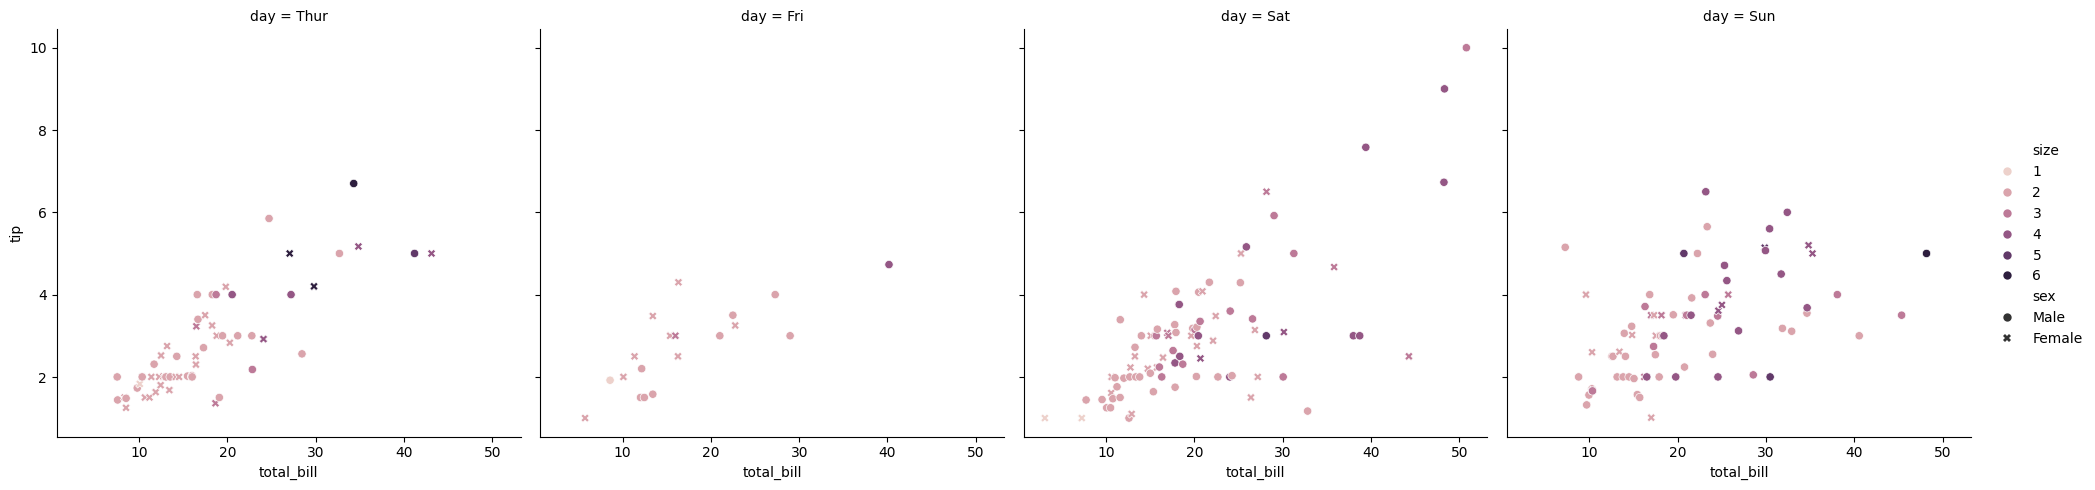

In [30]:
sns.relplot(data=df,x="total_bill",y="tip",hue="size",col="day",style="sex")

## **02. Categorical Plot**

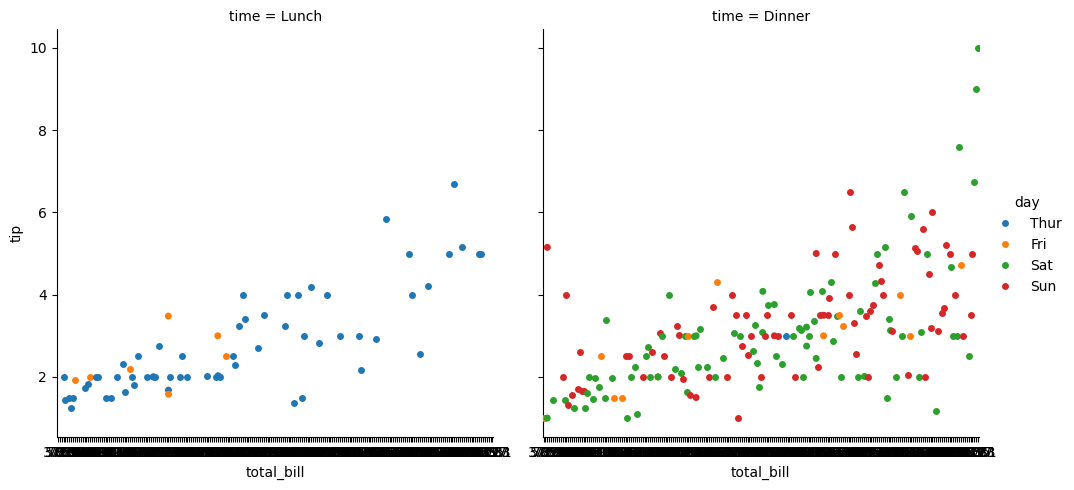

In [33]:
sns.catplot(data=df,x="total_bill",y="tip",hue="day",col="time")

## **03. Box plot and Count Plot**

<Axes: xlabel='day', ylabel='tip'>

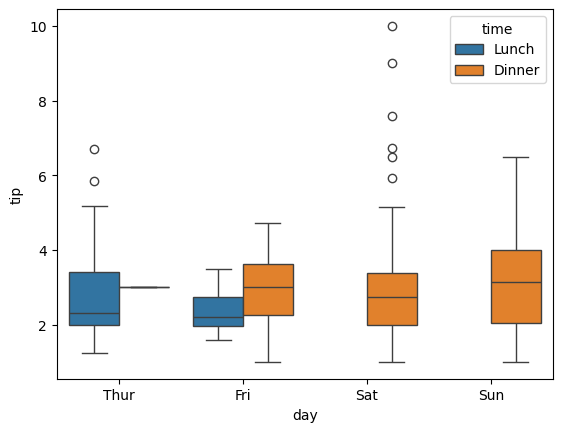

In [34]:
sns.boxplot(data=df,x='day',y='tip',hue='time')

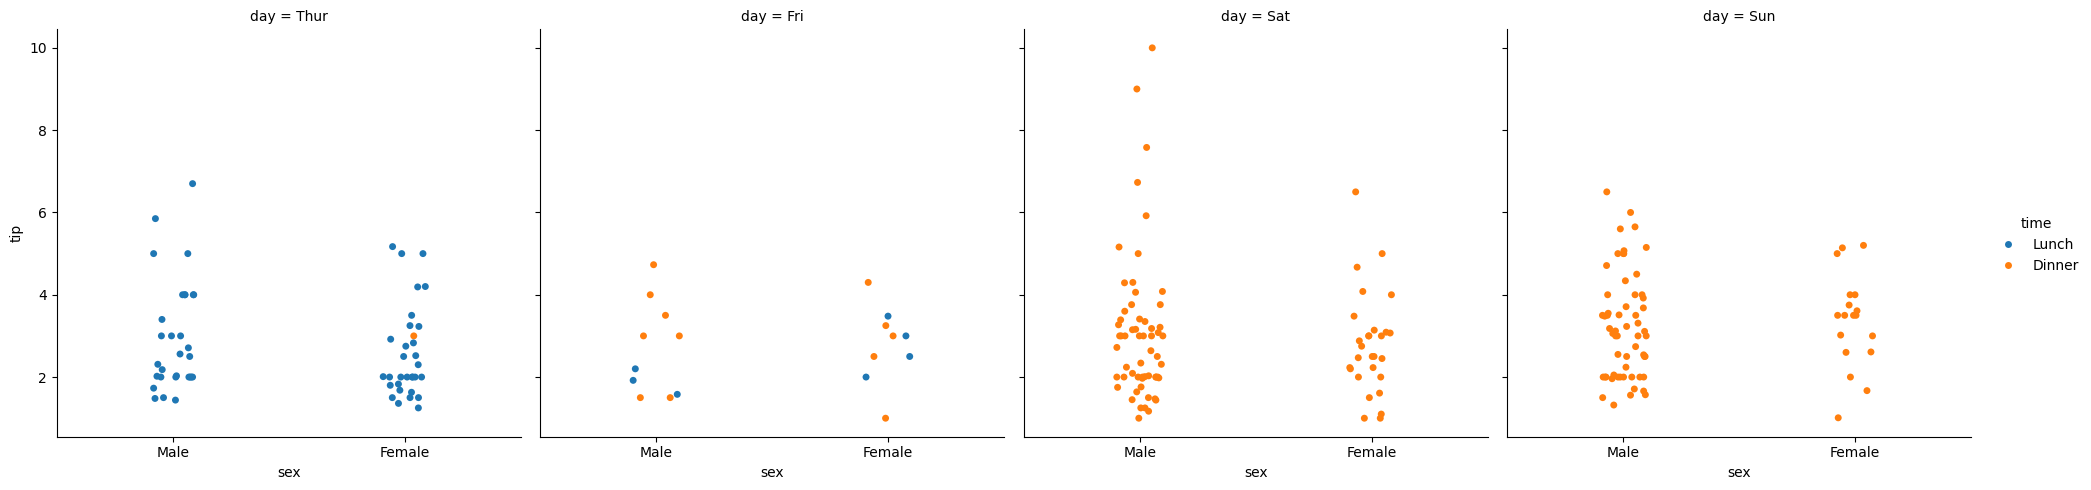

In [36]:
sns.catplot(data=df,x="sex",y="tip",col="day",hue="time")

day   sex   
Thur  Female    32
      Male      30
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

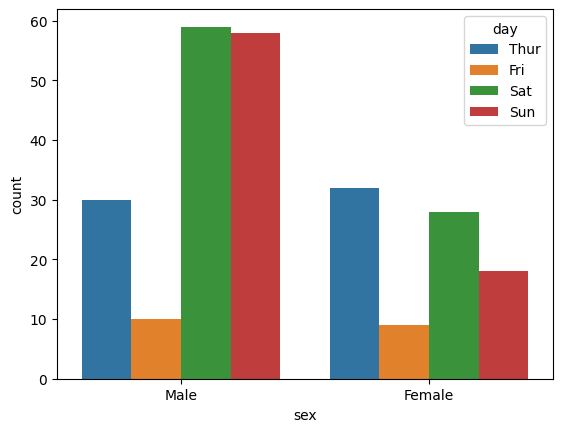

In [45]:
print(df.groupby("day",observed=False)["sex"].value_counts())
#Vivsiualtion of the above data
sns.countplot(data=df,x="sex",hue="day")